## Additional Goals: Incorporating additional texts
In this Jupyter notebook, we train an unsupervised HMM on the given Spenser texts in addition to the given Shakespearean sonnets. 

In [1]:
import os
import re
import pyphen
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

### Training Unsupervised HMM

#### Combining additional text files

In [35]:
spenser = open(os.path.join(os.getcwd(), 'data/spenser.txt')).read()
# Remove Roman numerals
spenser = re.sub('M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})', '', spenser)
# Remove numbers
shakespeare = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
shakespeare = "".join(filter(lambda x: not x.isdigit(), shakespeare)) 

In [117]:
# Combining Shakespeare and Spenser text files
text = shakespeare + spenser
text = text.lower().strip()
text = re.sub('(\n\s*)+\n', '\n', text)
# print(text)
obs, obs_map = parse_observations(text)

#### Helper Functions

In [9]:
# Uses the pyphen package to get the number of syllables for a given word
def syllables(word):
    dic = pyphen.Pyphen(lang='en')
    syl = dic.inserted(word).split('-')
    return len(syl)

In [102]:
def get_sample_sonnet(hmm, obs_map):
    # Total of 14 lines, 10 syllables each. There are 3 quatrains (4 lines) and 1 couplet (2 lines)
    sonnet = ""
    full = sample_sentence(hmm, obs_map, n_words=150).split()
    line_syllable = 0
    line_num = 0
    for word in full:
        if line_syllable == 0:
            word = word.capitalize()
        sonnet += word + " "
        
        line_syllable += syllables(word)
    
        if line_syllable >= 10:
            # creating new line once we go over 10 syllables, but syllables do not carry over to next line
            line_syllable = 0
            line_num += 1
            sonnet += "\n"
            if line_num % 4 == 0:
                sonnet += "\n"
        if line_num == 14:
            # once we have over 14 lines we return our sonnet
            break
    return sonnet

#### Sample Sonnet Outputs with Spenser Text

In [39]:
# Testing model using 1 hidden layer
hmm1 = unsupervised_HMM(obs, 1, 10)

In [103]:
print(get_sample_sonnet(hmm1, obs_map))

String climb oppression keen early who wardrobe 
Grave others alike return the who labouring 
Beautys spring prayer bud vassal burthen posterity 
Anothers anthems wife flower lovst face 

Dye aspect canopy song up too wail makes drugs 
Happies abundance age time sue quality 
Eyes allured smother meeds delivers way 
Sweetness abundance dancing ten store unvalued 

Time builds grave legacy black ransom making 
We destroys thereby posting we contracted 
Under lovst desire eyes bettring truest excuse 
Fortunes look unlooked eyes spring die if herald 

Making will age cold tombed making abundance 
Idly great having beloved fate keen nothing distilled 



In [ ]:
# Training model using 10 hidden layers
hmm10 = unsupervised_HMM(obs, 10, 100)

In [108]:
print('Sample Sonnet (HMM10):\n====================')
print(get_sample_sonnet(hmm10, obs_map))

Sample Sonnet (HMM10):
Still whose doth penance hereafter with my he their 
Great haste due longer nor blest shine show again taste 
Loved heart doth is shun her time with my wrongest 
More show time and see all is the would were 

Not but ye loves play but due to far faithful 
Furies thy busy by loves forty may in with 
Never have rehearse as fond through how a 
Coming in i when wounds doth be more she 

House gildst you self to his aread raise true come 
That that i do with you the sinful all 
End glory that this i like it canst ye 
Spites hath betray your leave to guilty rose true 

Level and mend like with nor junes extreme 
In she him motion foul tresses where treads 



In [68]:
# Training model using 16 hidden layers
hmm16 = unsupervised_HMM(obs, 16, 100)

In [106]:
print('Sample Sonnet (HMM16):\n====================')
print(get_sample_sonnet(hmm16, obs_map))

Sample Sonnet (HMM16):
Hast loves rudely thou befriends from he view 
Sharp thy bastard haste thee wit marigold monument 
Her or teach dost again best memory their 
Love poor praise image loving i clatter 

In made praise despight have pride before worse 
Heart the to be peace rather thy scourge to feed 
Avenge lighten thy so livery with covetize 
Which of thought seem with entire thy frailties 

Dead less that eye with shortnumbered wakened 
Quench thine this name law humbled each thou tears 
For two heart that point whereof wounds have desert 
Amis with still leave which for not teach back be 

With within canker and to gentle defects 
Into my love young might an past feeble 



### Visualization

#### Overall Wordcloud over all text files

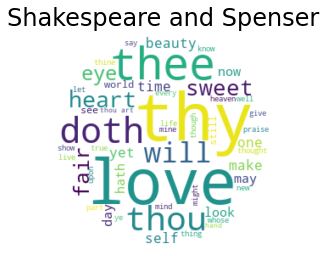

In [116]:
wordcloud = text_to_wordcloud(text, title='Shakespeare and Spenser')

#### Wordclouds for Each Hidden State

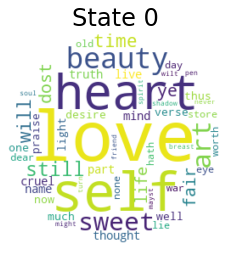

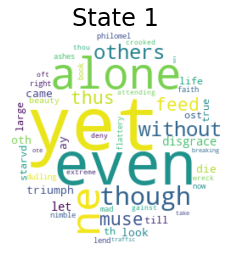

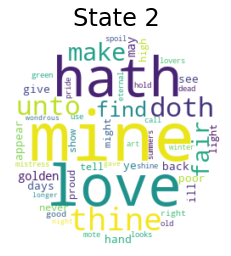

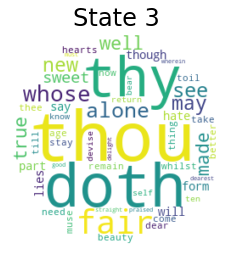

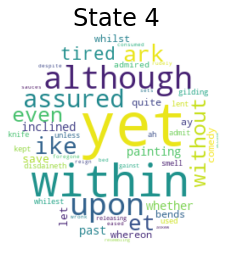

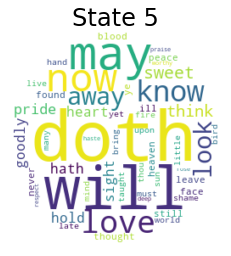

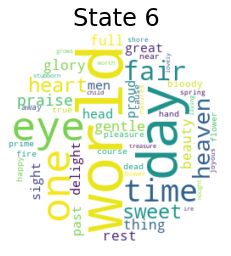

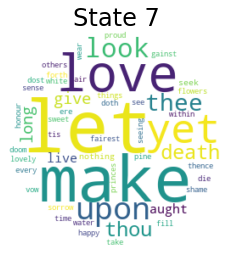

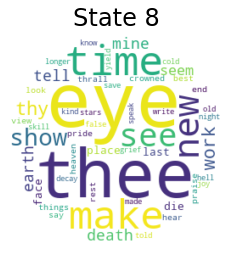

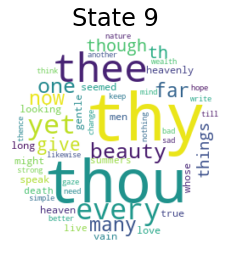

In [115]:
wordclouds = states_to_wordclouds(hmm10, obs_map)

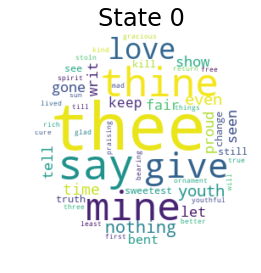

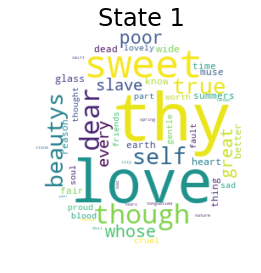

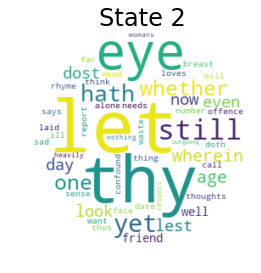

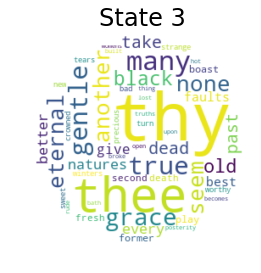

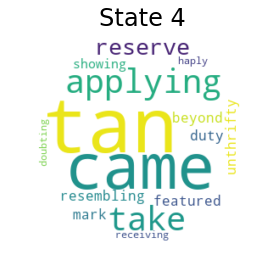

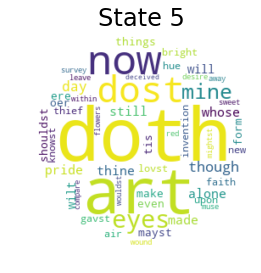

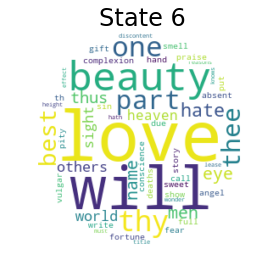

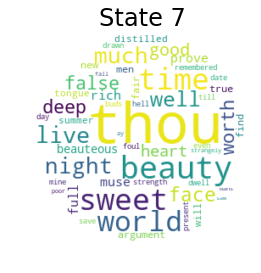

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [67]:
wordclouds = states_to_wordclouds(hmm16, obs_map)